## ***<h1>Credit Card Fraud Detection using Single Feed-Forward Multi-Layer Perceptron ANN***

***<h2>Phase 1: Importing required libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler        # for scaling and normalising to train ANN effectively
from sklearn.model_selection import train_test_split    # for splitting data
from sklearn.utils import class_weight                  # helps handle class imbalance by assigning weights

# for model performance evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc  

from tensorflow.keras.models import Sequential          # Sequential model type (layers stacked one after another)
from tensorflow.keras.layers import Dense, Dropout      # Dense = fully connected layer, Dropout = regularization
from tensorflow.keras.optimizers import Adam            # Optimizer (gradient descent variant) for training

import warnings
warnings.filterwarnings('ignore')                       # suppressing warnings for clean output

# Set plot style
sns.set(style="darkgrid")

***<h2>Phase 2: Loading the dataset to work on***

In [2]:
df = pd.read_csv("creditcard.csv")                                    # Loading dataset and understanding it

print("Shape of the dataset:", df.shape)                              # prints shape of the dataset(rows and columns)

print("\nDistribution of Class:\n", df['Class'].value_counts())       # distribution of legit and fraud classes

print("\nMissing values:\n", df.isnull().sum().sum())                 # values missing in the entire dataset

Shape of the dataset: (284807, 31)

Distribution of Class:
 Class
0    284315
1       492
Name: count, dtype: int64

Missing values:
 0


In [3]:
print("\nFirst five rows of the dataset:\n")                          # first 5 rows
df.head()


First five rows of the dataset:



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("\nLast five rows of the dataset:\n")                           # last 5 rows
df.tail()


Last five rows of the dataset:



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


***<h2>Phase 3 : EDA***

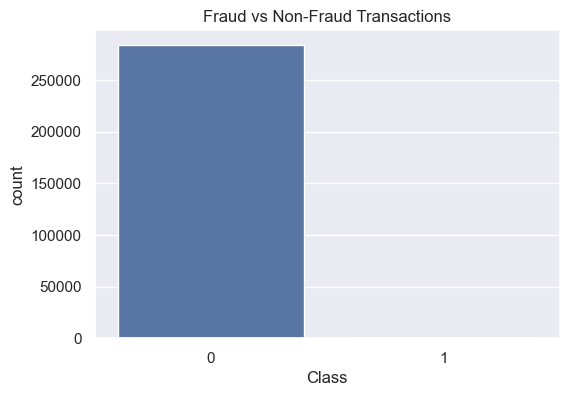

Fraud cases: 492
Legit cases: 284315
Fraud percentage: 0.1727%


In [5]:
# Class Imbalance visualization - shows fraud vs non-fraud counts.
# Visualizes the severe class imbalance, showing far fewer fraud cases compared to legitimate ones.

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

fraud_cases = df[df['Class']==1]
legit_cases = df[df['Class']==0]

print("Fraud cases:", len(fraud_cases))
print("Legit cases:", len(legit_cases))
print("Fraud percentage: {:.4f}%".format(len(fraud_cases)/len(df)*100))

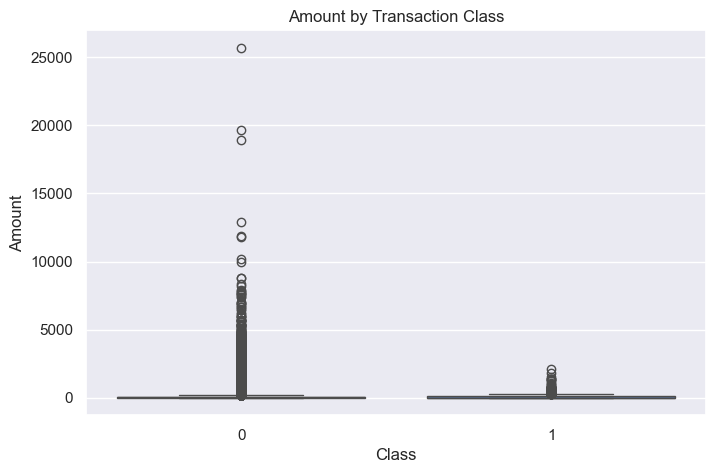

In [6]:
# Fraud vs Non-Fraud transaction amounts, highlighting differences and outliers.

plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Amount by Transaction Class")
plt.show()

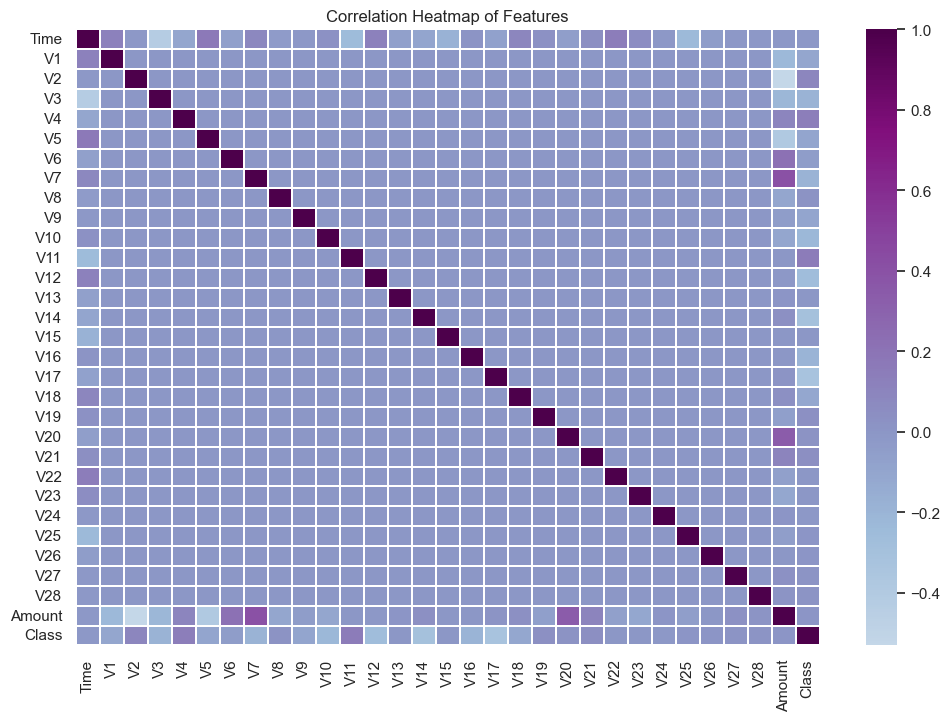

In [7]:
# Heatmap showing correlations between features to identify relationships and multicollinearity.  

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="BuPu", center=0, linewidths=0.1) 
plt.title("Correlation Heatmap of Features")
plt.show()

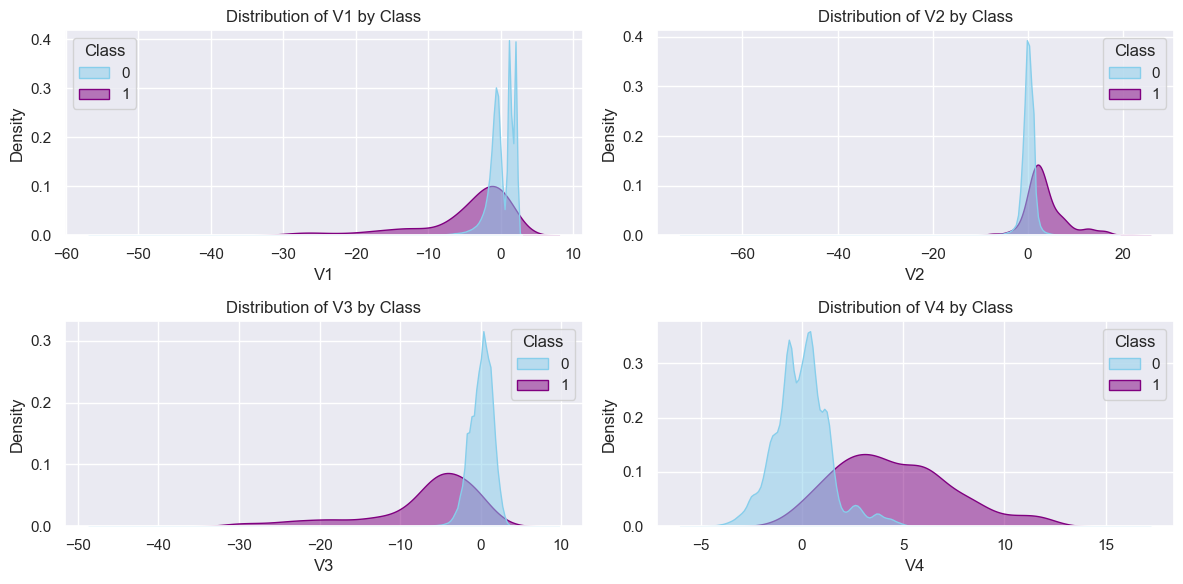

In [8]:
# KDE plots showing distribution of PCA components (V1–V4) for fraud(1) vs non-fraud(0) to highlight feature separation.  

plt.figure(figsize=(12,6))
for i, col in enumerate(['V1','V2','V3','V4']):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=df, x=col, hue='Class', fill=True, common_norm=False, alpha=0.5, palette=['skyblue', 'purple']) 
    plt.title(f"Distribution of {col} by Class")
plt.tight_layout()
plt.show()

***<h2>Phase 4: Preprocessing***

In [9]:
# Standardizes the "Amount" feature to improve model training efficiency and stability.  
# Drops "Time" and raw "Amount" since they do not contribute significantly after scaling.  

scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df = df.drop(['Time','Amount'], axis=1)

In [10]:
# Separates dataset into features (X) for model input and target (y) representing fraud vs non-fraud.  
# This prepares the data for training and evaluation of the classification model.  

X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
# Splits the dataset into training (80%) and testing (20%) sets while preserving the fraud-to-legit ratio using stratify.  
# Ensures the model sees balanced class proportions during training and evaluation, preventing bias.  
# Important: Stratification maintains the rare fraud cases in both train and test sets for reliable performance assessment.  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Data:", X_train.shape, "Testing Data:", X_test.shape,"\n")
print("Fraud % in train:", y_train.mean()*100, "\nFraud % in test:", y_test.mean()*100)

Training Data: (227845, 29) Testing Data: (56962, 29) 

Fraud % in train: 0.17292457591783889 
Fraud % in test: 0.17204452090867595


In [12]:
# Convert y_train to a 1D NumPy array(if required) to avoid shape issues during class weight computation.  
y_train = np.array(y_train).ravel()

# Computes class weights automatically to handle severe imbalance between fraud (1) and non-fraud (0).  
class_weights = class_weight.compute_class_weight(
    class_weight = 'balanced',
    classes = np.unique(y_train),                # Must match the unique labels in y_train
    y = y_train
)

# Generates a dictionary mapping each class (0 and 1) to its weight, giving more importance to rare fraud cases.
class_weights_dict = dict(zip(np.unique(y_train), class_weights))
print("Class Weights:\n", class_weights_dict)

# Important: These weights are later passed to model training so that the ANN does not ignore minority fraud samples.

Class Weights:
 {np.int64(0): np.float64(0.5008661206149896), np.int64(1): np.float64(289.14340101522845)}


***<h2>Phase 5: ANN model training***

In [13]:
# Builds the Artificial Neural Network (ANN) using a Sequential model with stacked layers.  
# Input Layer: Takes features from training data, first Dense layer has 32 neurons with ReLU activation.  
# Dropout Layers: Randomly drop 30% of neurons during training to reduce overfitting.  
# Hidden Layer: Second Dense layer with 16 neurons and ReLU activation for deeper feature learning.  
# Output Layer: Single neuron with sigmoid activation outputs probability of fraud (1) or non-fraud (0).  

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compiles the model using Adam optimizer, binary crossentropy loss (for classification), and accuracy as the metric.  
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 1,505 (5.88 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Trains the ANN model on training data with class weights applied to handle imbalance (fraud vs non-fraud).  
# Uses 20 epochs and large batch size (2048) for efficient training on big data.  
# validation_split = 0.2 reserves 20% of training data for validation to monitor overfitting during training.  
# class_weight ensures the rare fraud cases are given higher importance so the model learns to detect them.  
# verbose = 1 shows detailed progress of training (loss and accuracy per epoch).  

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=2048,
    validation_split=0.2,
    class_weight=class_weights_dict,
    verbose=1 )

# Saves the trained model as 'fraud_model.keras' so it can be reused later without retraining.  
model.save("fraud_model.keras")

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.4591 - loss: 0.7193 - val_accuracy: 0.7879 - val_loss: 0.6217
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7970 - loss: 0.4014 - val_accuracy: 0.9664 - val_loss: 0.4221
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9207 - loss: 0.3238 - val_accuracy: 0.9753 - val_loss: 0.3050
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9477 - loss: 0.2496 - val_accuracy: 0.9799 - val_loss: 0.2161
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9568 - loss: 0.2239 - val_accuracy: 0.9825 - val_loss: 0.1656
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9642 - loss: 0.1863 - val_accuracy: 0.9821 - val_loss: 0.1348
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9653 - loss: 0.1906 - val_accuracy: 0.9808 - val_loss: 0.1230
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9641 - loss: 0.1871 - val_accuracy: 0.9793 - v

***<h2>Phase 6: Model Evaluation***

In [16]:
# Predictions on test data (probabilities between 0 and 1)
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities into binary classes (0 or 1) using threshold = 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification Report - Print Precision, Recall, F1-score for both classes
print("Classification Report:\n", classification_report(y_test, y_pred))

#Calculate ROC-AUC score (area under ROC curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Important: threshold can be tuned (e.g., 0.3 or 0.7) to improve fraud detection
#    -Recall for fraud class (1) is most critical since we must catch maximum fraud cases
#    -AUC is a strong metric for imbalanced data, measures fraud vs non-fraud separability- 
#    -Display the ROC-AUC score (closer to 1 = better classification performance)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC Score: 0.9772313891791945


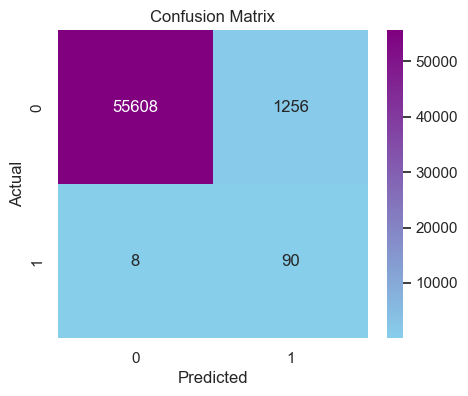

In [17]:
# Compute and visualise confusion matrix (rows = actual labels, columns = predicted labels)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))

custom_cmap = sns.blend_palette(['skyblue', 'purple'], as_cmap=True) 
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, edgecolor= 'black')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

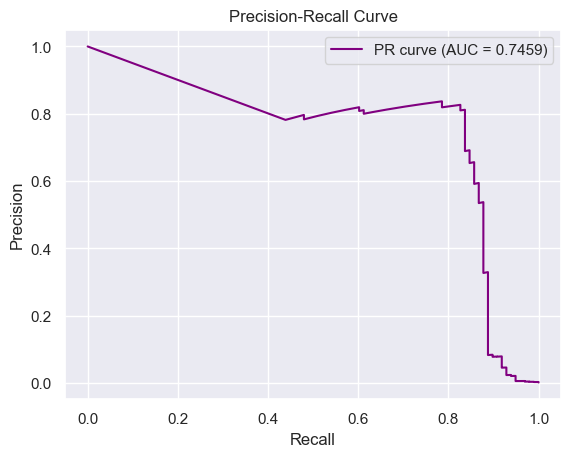

In [18]:
# Compute and visualise PR AUC, precision and recall values at different probability thresholds

prec, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, prec)
plt.plot(recall, prec, label=f'PR curve (AUC = {pr_auc:.4f})', color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

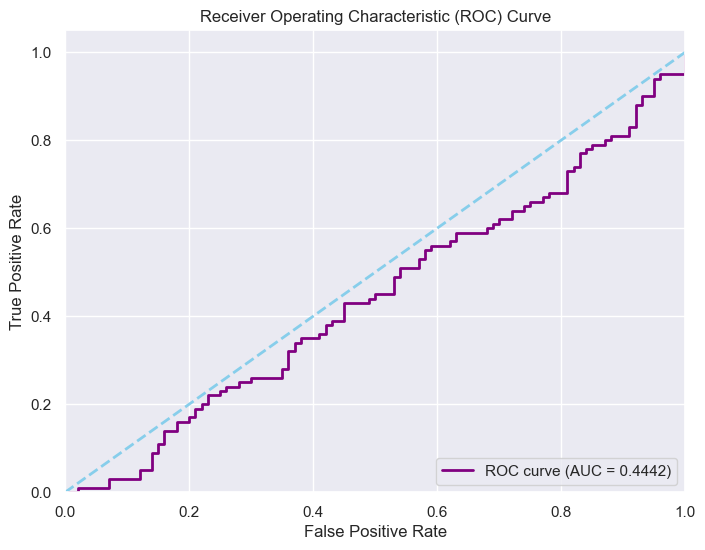

In [19]:
# Simulated test labels and predicted probabilities

np.random.seed(42)
y_test_roc = np.random.randint(0, 2, 200)         
y_pred_prob_roc = np.random.rand(200)            

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_roc, y_pred_prob_roc)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})') 
plt.plot([0,1], [0,1], color='skyblue', lw=2, linestyle='--')                          
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<i>ROC Curve evaluates model performance by comparing True Positive Rate (TPR) vs False Positive Rate (FPR).  
Important: TPR = ability to correctly identify fraud cases, FPR = incorrectly flagging legit cases as fraud.  

<i>AUC (Area Under Curve) shows overall separability: closer to 1 = excellent model, 0.5 = random guessing.  
Important: In imbalanced datasets (like fraud detection), ROC-AUC can sometimes look good even if fraud detection is poor.  

<i>The baseline diagonal line represents a random classifier (no predictive power).  
Important: A good model’s ROC curve should lie far above this diagonal.  

<i>Practical note: For fraud detection, Precision-Recall Curve is often more informative than ROC, since it focuses on how well the model captures rare fraud cases without too many false alarms. ROC Curve evaluates model performance by comparing True Positive Rate (TPR) vs False Positive Rate (FPR).</i>

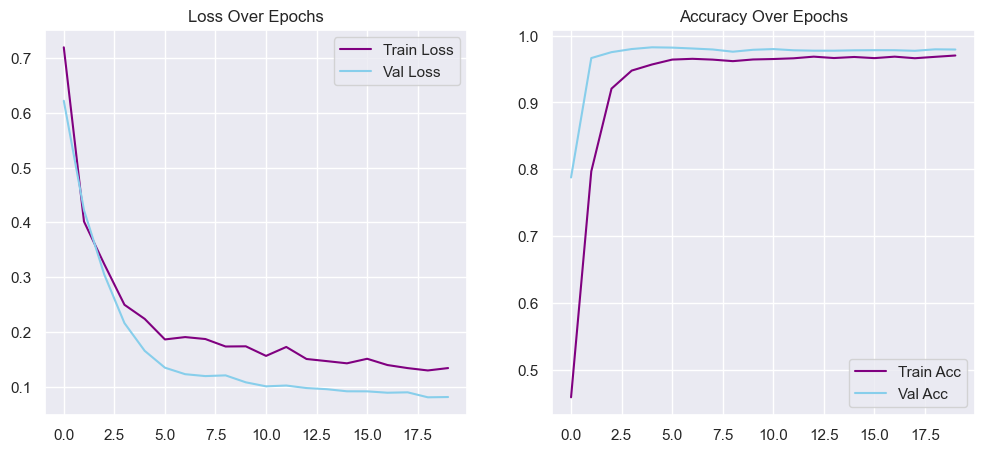

In [20]:
# Training Loss & Accuracy Curves

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', color='purple') 
plt.plot(history.history['val_loss'], label='Val Loss', color='skyblue') 
plt.legend(); plt.title("Loss Over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc', color='purple') 
plt.plot(history.history['val_accuracy'], label='Val Acc', color='skyblue') 
plt.legend(); plt.title("Accuracy Over Epochs")

plt.show()

<i>Plots training vs validation loss across epochs to check how well the model is learning.
Important: If validation loss increases while training loss decreases → model is overfitting.

<i>Plots training vs validation accuracy across epochs to evaluate performance.
Important: Both curves should ideally converge; large gaps indicate overfitting or underfitting.

<i>Loss curve is more reliable than accuracy for imbalanced data (fraud detection),
since accuracy can be misleading if the model predicts mostly non-fraud.

<i>These plots help in tuning epochs, batch size, and dropout rate to improve generalization.

In [21]:
# Function to test model with new unseen transaction
# input_data: list of 30 features (V1-V28, Amount_scaled, etc.) Example: a single row transaction

def predict_transaction(model, input_data):

    # Converts the list into a NumPy array and reshapes it to match the model’s input format.
    input_array = np.array(input_data).reshape(1,-1)    
    
    prediction_prob = model.predict(input_array)[0][0]
    prediction = int(prediction_prob > 0.5)
    print("Prediction Probability:", prediction_prob)
    print("Transaction Classified as:", "FRAUD" if prediction==1 else "LEGITIMATE")

In [22]:
# Example Usage:
# Taking first test transaction
sample = X_test.iloc[0].values
predict_transaction(model, sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction Probability: 0.0011650332
Transaction Classified as: LEGITIMATE


In [23]:
# Sample 1: Legitimate Transaction (random values from test set)

sample_legit = X_test[y_test==0].iloc[0].values
print("Testing with a LEGITIMATE transaction\n\n")
predict_transaction(model, sample_legit)

Testing with a LEGITIMATE transaction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Prediction Probability: 0.0011650332
Transaction Classified as: LEGITIMATE


In [24]:
# Sample 2: Fraudulent Transaction (random values from test set)

sample_fraud = X_test[y_test==1].iloc[0].values
print("\nTesting with a FRAUD transaction\n\n")
predict_transaction(model, sample_fraud)


Testing with a FRAUD transaction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction Probability: 0.99999154
Transaction Classified as: FRAUD
